# socket.io 설치



### 폴더 구조 변경
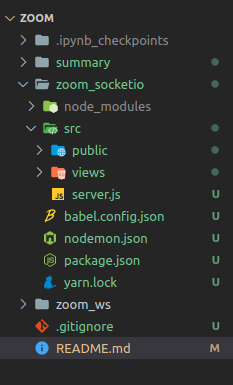

- 기존 WebSocket으로 작업하던 폴더를 zoom_ws로 바꿔서 보관

- zoom_socketio 폴더로 복사하여 준비함

## 01 설치

https://socket.io/

bash
```shell
 yarn add socket.io

```

---

## 02 server.js 수정
```javascript
import express from "express";
import http from "http";
import SocketIO from "socket.io";

const app = express();
const port = 3000;

// json file 입출력 설정
app.use(express.json());

// pug 설정
app.set("view engine", "pug");
app.set("views", __dirname + "/views");

// static 작업
app.use("/public", express.static(__dirname + "/public"));

// route 설정
app.get("/", (_, res) => res.render("home"));
app.get("/*", (_, res) => res.redirect("/"));

const server = http.createServer(app);
const io = SocketIO(server);

server.listen(port, () => {
  console.log(`Joom app listening on http://localhost:${port}`);
});

```

---

## 03 front에 socket.io 설치 

### Home.pug

```pug
doctype html
html(lang="en")
  head
    meta(charset="UTF-8")
    meta(http-equiv="X-UA-Compatible", content="IE=edge")
    meta(name="viewport", content="width=device-width, initial-scale=1.0")
    title Joom
    //- MVP CSS 사용
    link(rel="stylesheet", href="https://unpkg.com/mvp.css@1.12/mvp.css") 
  body 
    header
      h1 Joom 
    main 
    //- socket.io 설치
    script(src="/socket.io/socket.io.js")
    script(src="/public/js/app.js") 
    
```

### app.js
```javasciprt

const socket = io();

```

---

## 04 server.js 에서 ioserver 연결

```javascript
wsServer.on("connection", (socket) => {
  console.log(socket);
});

```
### server.js
```javascript
import express from "express";
import http from "http";
import SocketIO from "socket.io";

const app = express();
const port = 3000;

// json file 입출력 설정
app.use(express.json());

// pug 설정
app.set("view engine", "pug");
app.set("views", __dirname + "/views");

// static 작업
app.use("/public", express.static(__dirname + "/public"));

// route 설정
app.get("/", (_, res) => res.render("home"));
app.get("/*", (_, res) => res.redirect("/"));

// http server
const httpServer = http.createServer(app);

// io server
const wsServer = SocketIO(httpServer);

wsServer.on("connection", (socket) => {
  console.log(socket);
});

httpServer.listen(port, () => {
  console.log(`Joom app listening on http://localhost:${port}`);
});

```